In [1]:
# Installing all required libraries
!pip install numpy pandas matplotlib seaborn plotly dash yfinance statsmodels arch scikit-learn hmmlearn scipy pandas_datareader --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.2 MB/s eta 0:00:00


In [2]:
# Importing required libraries
import yfinance as yf
import pandas as pd

# defining adjusted start and end dates
start_date = '2015-04-01'
end_date = '2025-03-31'

# defining ticker symbols
tickers = ['SPY', 'TLT', 'BTC-USD']

# Downloading market data for SPY, TLT, BTC-USD from Yahoo Finance
market_data = yf.download(tickers, start=start_date, end=end_date)

# Displaying the first 10 rows to confirm successful data download
market_data.head(10)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker         BTC-USD         SPY         TLT     BTC-USD         SPY   
Date                                                                     
2015-04-01  247.272003  173.070541  102.283157  247.541000  173.676331   
2015-04-02  253.005005  173.693146  101.199402  254.460999  174.147482   
2015-04-03  254.322006         NaN         NaN  256.042999         NaN   
2015-04-04  253.697006         NaN         NaN  255.257996         NaN   
2015-04-05  260.597992         NaN         NaN  260.674988         NaN   
2015-04-06  255.492004  174.862625  100.634262  261.798004  175.384272   
2015-04-07  253.179993  174.399918  101.478065  255.804993  175.645147   
2015-04-08  245.022003  174.988892  101.509056  253.847000  175.434819   
2015-04-09  243.675995  175.762909  100.193069  246.117996  175.998492   
2015-04-10  236.072006  176.722061  100.340118  243.694000  176.764132   

Price                          Low                                Open  \
Ticker             TLT     BTC-USD         SPY         TLT     BTC-USD   
Date                                                                     
2015-04-01  102.554089  241.160004  172.069305  101.640645  244.223007   
2015-04-02  102.159303  245.416000  172.818110  101.106512  247.089005   
2015-04-03         NaN  251.878998         NaN         NaN  253.074005   
2015-04-04         NaN  251.100006         NaN         NaN  254.291000   
2015-04-05         NaN  251.942001         NaN         NaN  253.761002   
2015-04-06  101.779941  254.574997  172.658231  100.417512  260.721008   
2015-04-07  101.578704  252.205002  174.366268  100.518177  255.274002   
2015-04-08  101.687098  244.214996  174.231660  100.649793  253.063995   
2015-04-09  101.346498  239.399994  174.324168   99.960846  244.751007   
2015-04-10  100.982631  232.770996  175.813389  100.285937  243.694000   

Price                                 Volume                          
Ticker             SPY         TLT   BTC-USD          SPY        TLT  
Date                                                                  
2015-04-01  173.651091  101.663867  22877200  137303600.0  9273900.0  
2015-04-02  173.003213  102.128332  26272600   86900900.0  6663400.0  
2015-04-03         NaN         NaN  23146600          NaN        NaN  
2015-04-04         NaN         NaN  12493500          NaN        NaN  
2015-04-05         NaN         NaN  19649200          NaN        NaN  
2015-04-06  172.792841  101.741233  20034200  114368200.0  5923800.0  
2015-04-07  174.887916  100.812330  18467400   81236300.0  4764900.0  
2015-04-08  174.627107  101.423904  30086400   89351900.0  5378900.0  
2015-04-09  174.820575  101.307790  21643500   85548900.0  6484200.0  
2015-04-10  176.015311  100.882005  28882000   72722900.0  4843000.0

In [3]:
# Importing pandas_datareader explicitly for fetching macroeconomic data
from pandas_datareader import data as pdr

# Defining macroeconomic indicators explicitly from FRED
macro_indicators = {
    'CPIAUCSL': 'Inflation',           # Consumer Price Index for All Urban Consumers
    'GDP': 'GDP',                      # Gross Domestic Product
    'FEDFUNDS': 'Fed_Interest_Rate',   # Federal Funds Rate
    'UNRATE': 'Unemployment_Rate'      # Unemployment Rate
}

# Defining the start and end dates (same as market data explicitly)
start_date = '2015-04-01'
end_date = '2025-03-31'

# Downloading explicitly each indicator from FRED
macro_data = pdr.DataReader(list(macro_indicators.keys()), 'fred', start_date, end_date)

# Renaming columns explicitly for clarity
macro_data.rename(columns=macro_indicators, inplace=True)

# Checking the first few rows explicitly
macro_data.head(10)


,Inflation,GDP,Fed_Interest_Rate,Unemployment_Rate
DATE,,,,
2015-04-01,236.222,18279.784,0.12,5.4
2015-05-01,237.001,NaN,0.12,5.6
2015-06-01,237.657,NaN,0.13,5.3
2015-07-01,238.034,18401.626,0.13,5.2
2015-08-01,238.033,NaN,0.14,5.1
2015-09-01,237.498,NaN,0.14,5.0
2015-10-01,237.733,18435.137,0.12,5.0
2015-11-01,238.017,NaN,0.12,5.1
2015-12-01,237.761,NaN,0.24,5.0


In [4]:
# Saving market data to Excel file
market_data.to_excel("market_data.xlsx")

# Saving macroeconomic data to Excel file
macro_data.to_excel("macro_data.xlsx")


In [5]:
# Step 3: Explicit Data Preparation and Formatting

# Market Data Preparation
# Selecting Adjusted Close prices explicitly for analysis clarity
adj_close = market_data['Close'].copy()
adj_close.columns = ['BTC', 'SPY', 'TLT']

# Resampling market data explicitly to business days to match SPY and TLT trading days
adj_close = adj_close.asfreq('B')

# Forward-fill missing values explicitly (due to weekends and holidays)
adj_close.ffill(inplace=True)

# Checking explicitly for remaining missing values in market data
market_missing_after = adj_close.isnull().sum()
print("Remaining missing values in Market Data after handling:\n", market_missing_after)

# Macroeconomic Data Preparation
# Forward-fill GDP data explicitly (quarterly data into monthly)
macro_data_ffill = macro_data.resample('MS').ffill()

# Checking explicitly for remaining missing values in macroeconomic data
macro_missing_after = macro_data_ffill.isnull().sum()
print("\nRemaining missing values in Macroeconomic Data after handling:\n", macro_missing_after)

# Display explicitly prepared datasets (first few rows)
print("\nMarket Data (first 5 rows):")
print(adj_close.head())

print("\nMacroeconomic Data (first 5 rows):")
print(macro_data_ffill.head())


Remaining missing values in Market Data after handling:
 BTC    0
SPY    0
TLT    0
dtype: int64

Remaining missing values in Macroeconomic Data after handling:
 Inflation             0
GDP                  81
Fed_Interest_Rate     0
Unemployment_Rate     0
dtype: int64

Market Data (first 5 rows):
                   BTC         SPY         TLT
Date                                          
2015-04-01  247.272003  173.070541  102.283157
2015-04-02  253.005005  173.693146  101.199402
2015-04-03  254.322006  173.693146  101.199402
2015-04-06  255.492004  174.862625  100.634262
2015-04-07  253.179993  174.399918  101.478065

Macroeconomic Data (first 5 rows):
            Inflation        GDP  Fed_Interest_Rate  Unemployment_Rate
DATE                                                                  
2015-04-01    236.222  18279.784               0.12                5.4
2015-05-01    237.001        NaN               0.12                5.6
2015-06-01    237.657        NaN               0.13

In [6]:
# Step 3B: Final forward-fill for GDP and Inflation

# Forward-filling remaining GDP and Inflation values
macro_data_cleaned = macro_data_ffill.copy()
macro_data_cleaned['GDP'] = macro_data_cleaned['GDP'].ffill()
macro_data_cleaned['Inflation'] = macro_data_cleaned['Inflation'].ffill()

# Checking again for any remaining missing values
remaining_nulls = macro_data_cleaned.isnull().sum()
print("Remaining missing values after final forward-fill:\n", remaining_nulls)

# Showing the first few cleaned rows
print("\nFully cleaned Macroeconomic Data (first 5 rows):")
macro_data_cleaned.head()


Remaining missing values after final forward-fill:
 Inflation            0
GDP                  0
Fed_Interest_Rate    0
Unemployment_Rate    0
dtype: int64

Fully cleaned Macroeconomic Data (first 5 rows):


,Inflation,GDP,Fed_Interest_Rate,Unemployment_Rate
DATE,,,,
2015-04-01,236.222,18279.784,0.12,5.4
2015-05-01,237.001,18279.784,0.12,5.6
2015-06-01,237.657,18279.784,0.13,5.3
2015-07-01,238.034,18401.626,0.13,5.2
2015-08-01,238.033,18401.626,0.14,5.1


In [7]:
# Step 3E: Forcing index to first of the month using a reliable offset
monthly_market_data = adj_close.resample('M').last()
monthly_market_data.index = monthly_market_data.index.map(lambda d: d - pd.offsets.MonthEnd(1) + pd.offsets.MonthBegin(0))

# Showing the index to confirm it now matches macro data
print("Corrected Monthly Market Data Index (first 5 rows):\n")
monthly_market_data.head()


Corrected Monthly Market Data Index (first 5 rows):



<ipython-input-7-aae71548b793>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_market_data = adj_close.resample('M').last()


,BTC,SPY,TLT
Date,,,
2015-04-01,236.145004,175.392746,97.499115
2015-05-01,237.095993,177.647583,95.186012
2015-06-01,263.071991,174.039185,91.310036
2015-07-01,284.649994,177.970566,95.460991
2015-08-01,230.056000,167.123276,94.802803


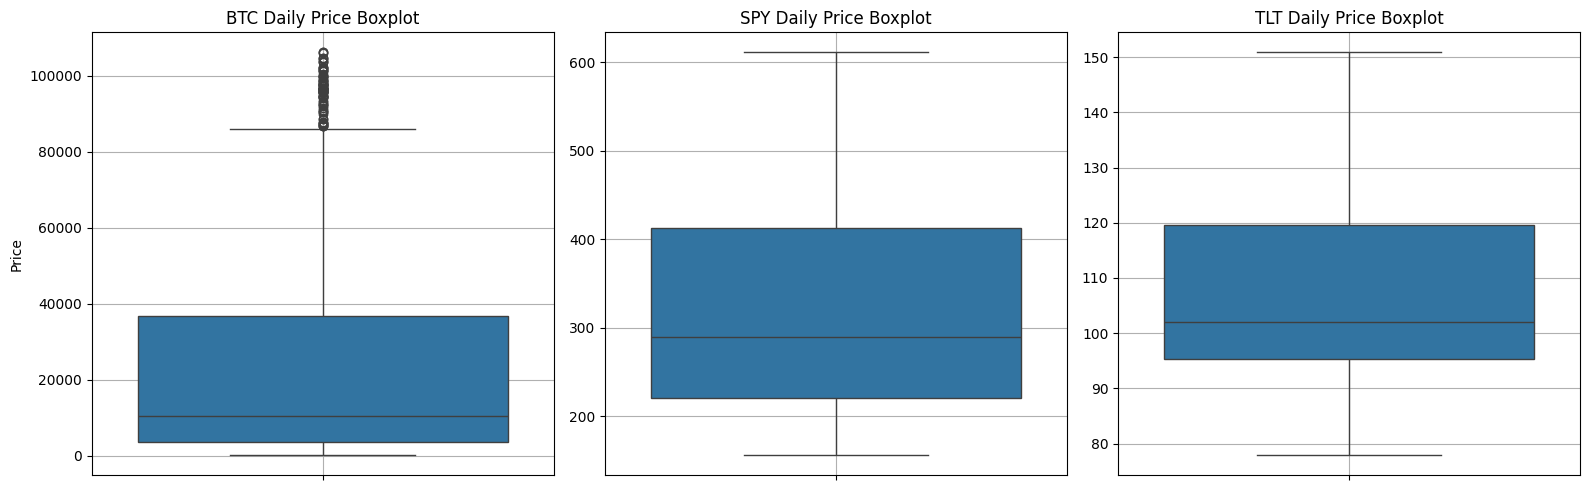

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing a melted DataFrame for easier plotting
melted_data = adj_close.reset_index().melt(id_vars='Date', value_vars=['BTC', 'SPY', 'TLT'])

# Creating individual subplots
plt.figure(figsize=(16, 5))

assets = ['BTC', 'SPY', 'TLT']
for i, asset in enumerate(assets):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y='value', data=melted_data[melted_data['variable'] == asset])
    plt.title(f'{asset} Daily Price Boxplot')
    plt.ylabel("Price" if i == 0 else "")
    plt.xlabel("")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import zscore
import numpy as np

# Computing Z-scores for each asset explicitly
z_scores = adj_close.apply(zscore)

# Flagging values where |Z| > 3 as outliers
outliers = (np.abs(z_scores) > 3)

# Counting of outliers per asset
outlier_counts = outliers.sum()

print("Number of outliers detected using Z-score > 3:\n")
print(outlier_counts)

# Displaying the dates where outliers were found (first 5 per asset)
print("\nSample outlier dates per asset:")
for col in outliers.columns:
    dates = outliers[outliers[col]].index
    print(f"{col}: {list(dates[:5])}")


Number of outliers detected using Z-score > 3:

BTC    47
SPY     0
TLT     0
dtype: int64

Sample outlier dates per asset:
BTC: [Timestamp('2024-11-21 00:00:00'), Timestamp('2024-11-22 00:00:00'), Timestamp('2024-11-29 00:00:00'), Timestamp('2024-12-04 00:00:00'), Timestamp('2024-12-05 00:00:00')]
SPY: []
TLT: []


In [10]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Calculating log returns for each asset explicitly
log_returns = np.log(adj_close / adj_close.shift(1)).dropna()

# Function to run and format ADF test results
def run_adf(series, name):
    result = adfuller(series)
    print(f"ADF Test for {name}")
    print(f"  Test Statistic      : {result[0]:.4f}")
    print(f"  p-value             : {result[1]:.4f}")
    print(f"  Critical Values     :")
    for key, value in result[4].items():
        print(f"    {key}: {value:.4f}")
    print(f"  Stationary?         : {'Yes' if result[1] < 0.05 else 'No'}\n")

# Running ADF test for each asset
for asset in log_returns.columns:
    run_adf(log_returns[asset], asset)


ADF Test for BTC
  Test Statistic      : -51.4988
  p-value             : 0.0000
  Critical Values     :
    1%: -3.4329
    5%: -2.8626
    10%: -2.5674
  Stationary?         : Yes

ADF Test for SPY
  Test Statistic      : -13.6042
  p-value             : 0.0000
  Critical Values     :
    1%: -3.4329
    5%: -2.8627
    10%: -2.5674
  Stationary?         : Yes

ADF Test for TLT
  Test Statistic      : -9.9007
  p-value             : 0.0000
  Critical Values     :
    1%: -3.4329
    5%: -2.8627
    10%: -2.5674
  Stationary?         : Yes



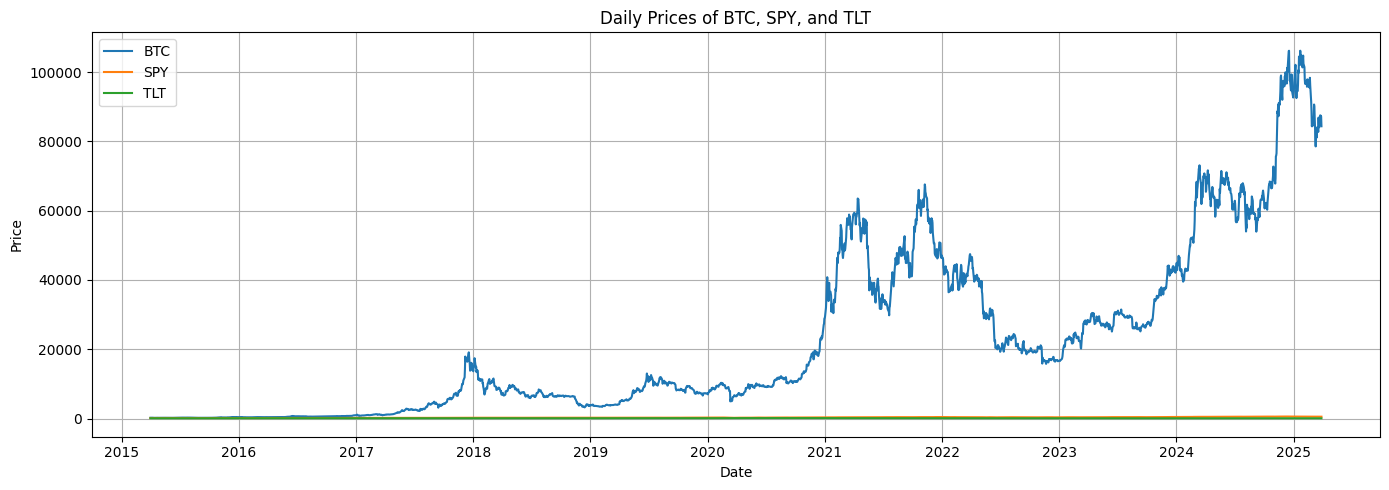

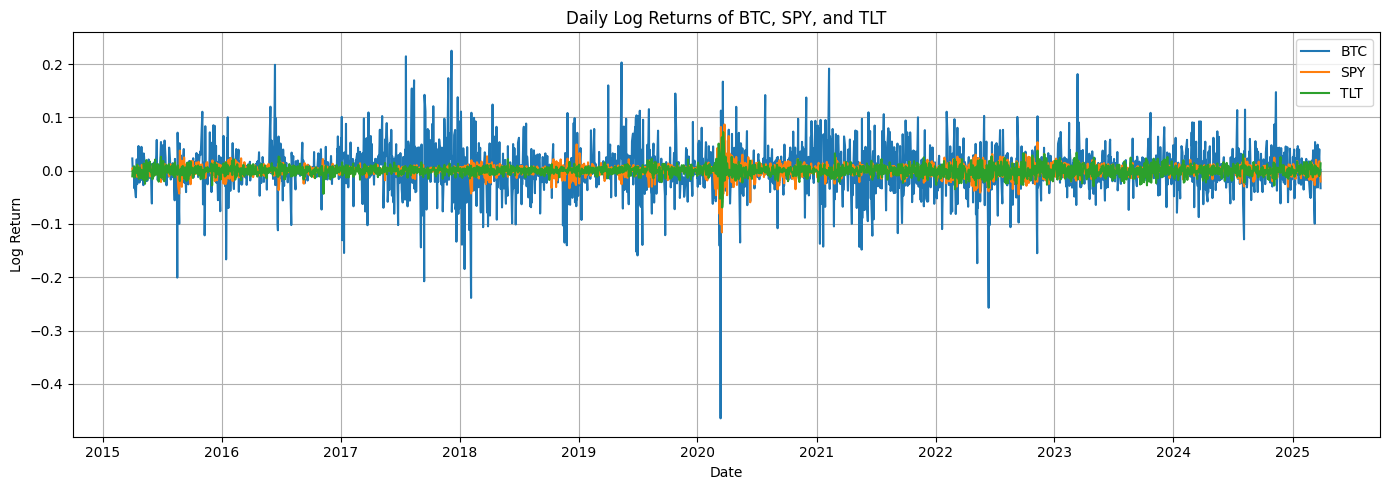

In [11]:
import matplotlib.pyplot as plt

# Step 5A: Plotting Daily Prices
plt.figure(figsize=(14, 5))
for asset in adj_close.columns:
    plt.plot(adj_close.index, adj_close[asset], label=asset)
plt.title("Daily Prices of BTC, SPY, and TLT")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Log Returns
log_returns = np.log(adj_close / adj_close.shift(1)).dropna()
plt.figure(figsize=(14, 5))
for asset in log_returns.columns:
    plt.plot(log_returns.index, log_returns[asset], label=asset)
plt.title("Daily Log Returns of BTC, SPY, and TLT")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Calculating statistical moments for daily log returns
stats_summary = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Median': log_returns.median(),
    'Standard Deviation': log_returns.std(),
    'Skewness': log_returns.skew(),
    'Kurtosis': log_returns.kurt()
}).round(5)

# Displaying summary table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Statistical Summary of Daily Log Returns:\n")
display(stats_summary)


Statistical Summary of Daily Log Returns:



,Mean,Median,Standard Deviation,Skewness,Kurtosis
BTC,0.00224,0.00192,0.04207,-0.62797,9.86388
SPY,0.00045,0.00044,0.01097,-0.80900,14.10347
TLT,-0.00005,0.00000,0.00941,0.02891,4.86499


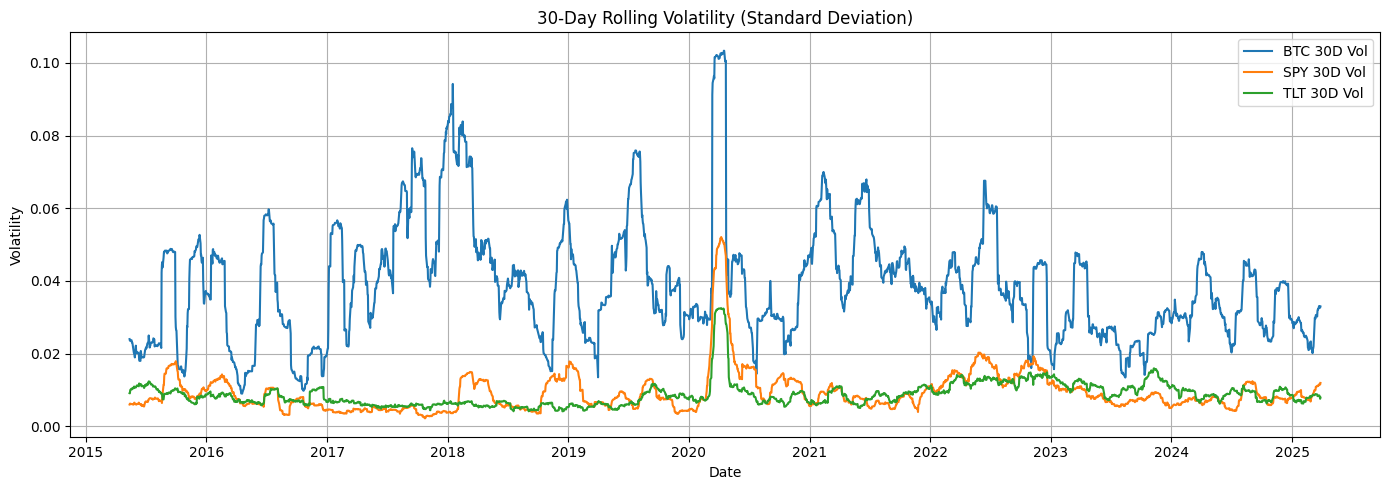

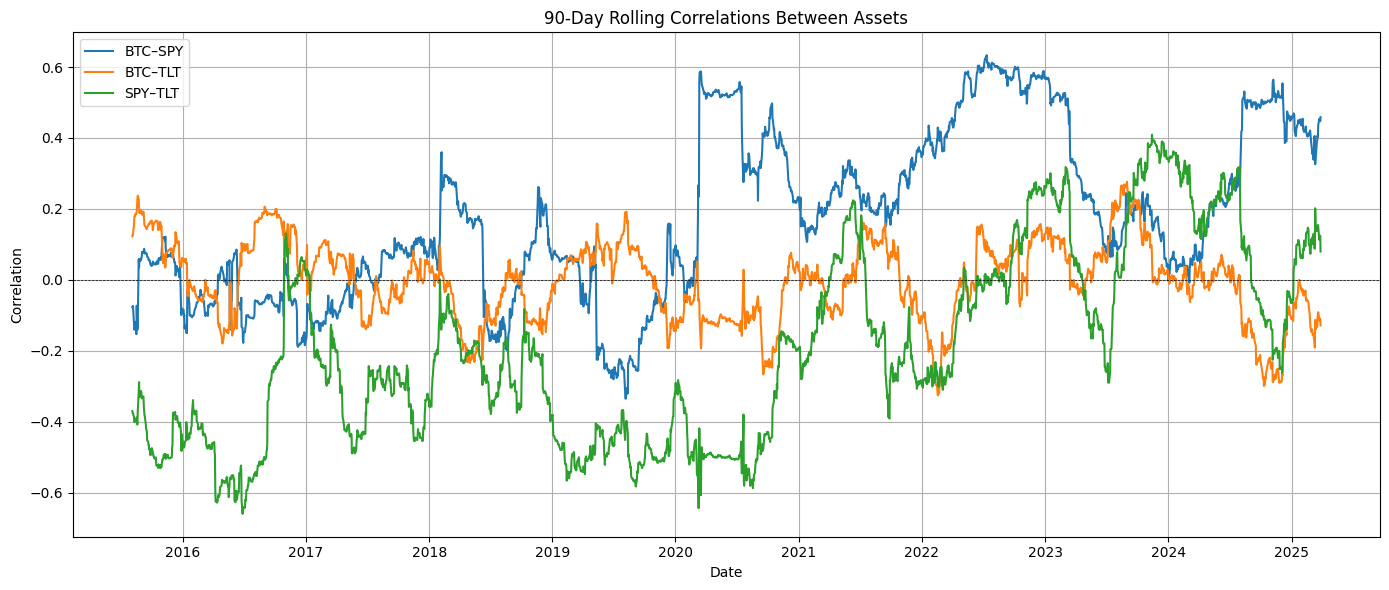

In [13]:
# Step 5C: Rolling 30-day Volatility (standard deviation)
rolling_vol = log_returns.rolling(window=30).std()

plt.figure(figsize=(14, 5))
for col in rolling_vol.columns:
    plt.plot(rolling_vol.index, rolling_vol[col], label=f"{col} 30D Vol")
plt.title("30-Day Rolling Volatility (Standard Deviation)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Rolling 90-day Correlation between each pair
plt.figure(figsize=(14, 6))
plt.plot(log_returns['BTC'].rolling(90).corr(log_returns['SPY']), label='BTC–SPY')
plt.plot(log_returns['BTC'].rolling(90).corr(log_returns['TLT']), label='BTC–TLT')
plt.plot(log_returns['SPY'].rolling(90).corr(log_returns['TLT']), label='SPY–TLT')
plt.title("90-Day Rolling Correlations Between Assets")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
def compute_tail_risk(series, confidence_levels=[0.95, 0.99]):
    var_cvar = {}
    sorted_returns = np.sort(series)
    for cl in confidence_levels:
        index = int((1 - cl) * len(sorted_returns))
        var = -sorted_returns[index]  # VaR as a positive number
        cvar = -sorted_returns[:index].mean()  # CVaR as a positive number
        var_cvar[f'VaR {int(cl*100)}%'] = round(var, 5)
        var_cvar[f'CVaR {int(cl*100)}%'] = round(cvar, 5)
    return var_cvar

# Calculating VaR and CVaR for each asset
tail_risk_summary = {}
for asset in log_returns.columns:
    tail_risk_summary[asset] = compute_tail_risk(log_returns[asset])

# Converting to DataFrame
tail_risk_df = pd.DataFrame(tail_risk_summary).T
print("Tail Risk Summary (Daily Returns):")
display(tail_risk_df)


Tail Risk Summary (Daily Returns):


,VaR 95%,CVaR 95%,VaR 99%,CVaR 99%
BTC,0.06255,0.10131,0.12883,0.17143
SPY,0.01690,0.02738,0.03217,0.04711
TLT,0.01507,0.02069,0.02327,0.03135


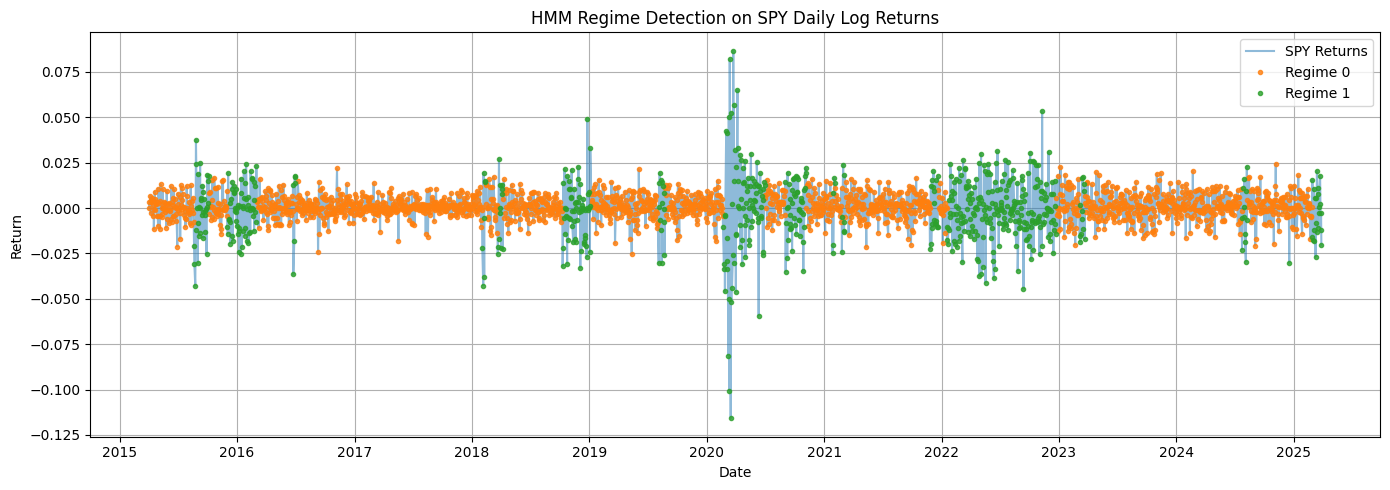

In [15]:
from hmmlearn.hmm import GaussianHMM
import numpy as np
import matplotlib.pyplot as plt

# Extracting SPY daily log returns
spy_returns = log_returns['SPY'].dropna().values.reshape(-1, 1)

# Fit 2-state Gaussian HMM
model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state=42)
model.fit(spy_returns)

# Predicting hidden states
hidden_states = model.predict(spy_returns)

# Creating plot
plt.figure(figsize=(14, 5))
plt.plot(log_returns.index, spy_returns, label="SPY Returns", alpha=0.5)

# Overlaying states
for i in range(model.n_components):
    state_mask = hidden_states == i
    plt.plot(log_returns.index[state_mask], spy_returns[state_mask],
             '.', label=f'Regime {i}', alpha=0.8)

plt.title("HMM Regime Detection on SPY Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


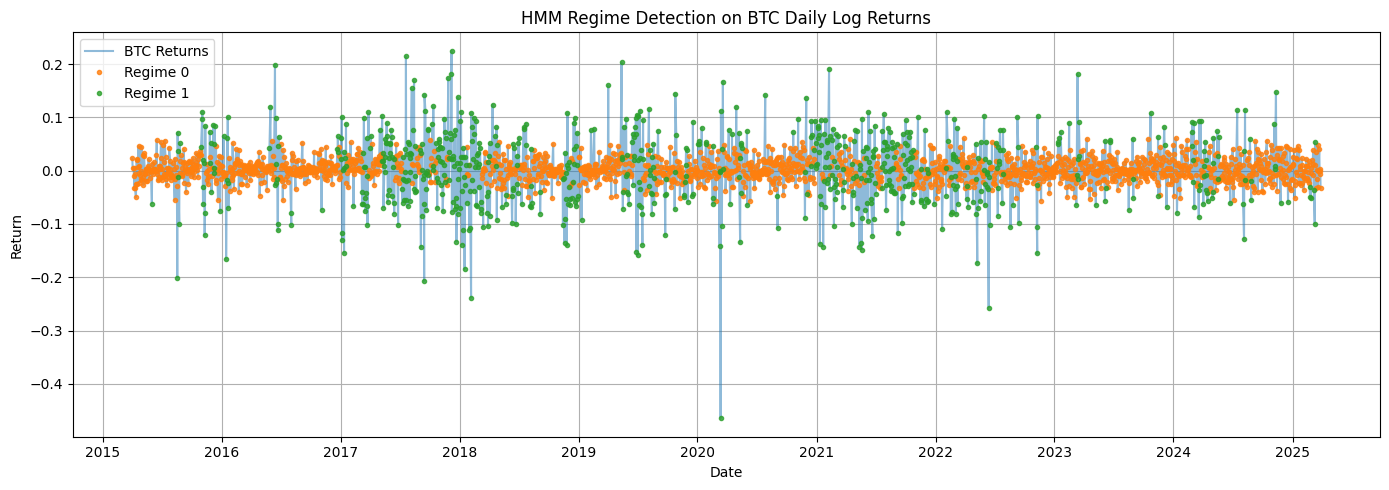

In [16]:
# Extracting BTC daily log returns
btc_returns = log_returns['BTC'].dropna().values.reshape(-1, 1)

# Fit HMM with 2 regimes
btc_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state=42)
btc_model.fit(btc_returns)

# Predicting hidden states
btc_states = btc_model.predict(btc_returns)

# Plotting the regimes
plt.figure(figsize=(14, 5))
plt.plot(log_returns.index, btc_returns, label="BTC Returns", alpha=0.5)

for i in range(btc_model.n_components):
    state_mask = btc_states == i
    plt.plot(log_returns.index[state_mask], btc_returns[state_mask],
             '.', label=f'Regime {i}', alpha=0.8)

plt.title("HMM Regime Detection on BTC Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


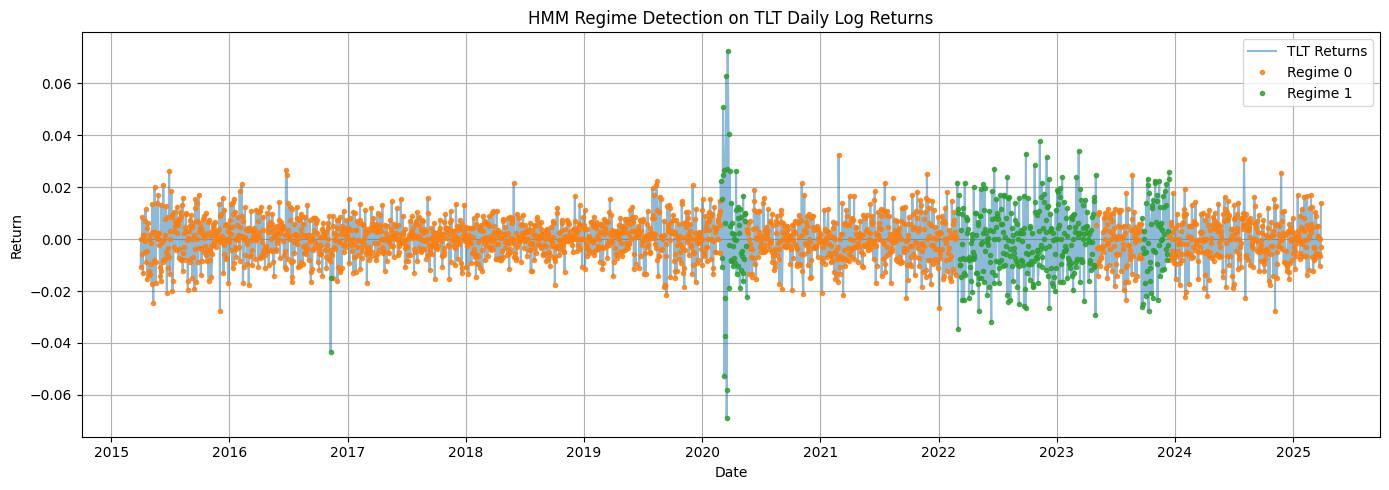

In [17]:
# Extracting TLT daily log returns
tlt_returns = log_returns['TLT'].dropna().values.reshape(-1, 1)

# Fit HMM with 2 regimes
tlt_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state=42)
tlt_model.fit(tlt_returns)

# Predicting hidden states
tlt_states = tlt_model.predict(tlt_returns)

# Plotting the regimes
plt.figure(figsize=(14, 5))
plt.plot(log_returns.index, tlt_returns, label="TLT Returns", alpha=0.5)

for i in range(tlt_model.n_components):
    state_mask = tlt_states == i
    plt.plot(log_returns.index[state_mask], tlt_returns[state_mask],
             '.', label=f'Regime {i}', alpha=0.8)

plt.title("HMM Regime Detection on TLT Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                        Markov Switching Model Results                        
Dep. Variable:                    SPY   No. Observations:                 2607
Model:               MarkovRegression   Log Likelihood                8641.986
Date:                Sun, 27 Apr 2025   AIC                         -17271.973
Time:                        14:06:05   BIC                         -17236.777
Sample:                    04-02-2015   HQIC                        -17259.222
                         - 03-28-2025                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      7.675      0.000       0.001       0.001
sigma2      3.289e-05   1.71e-06     19.284      0.0

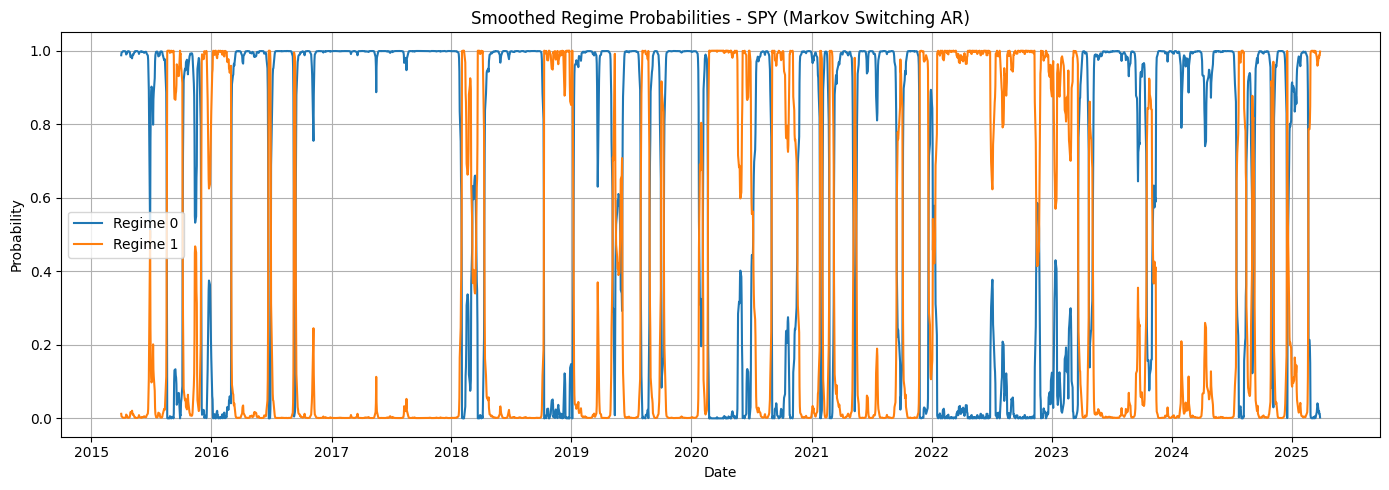

In [18]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Using SPY daily log returns
spy_returns_series = log_returns['SPY'].dropna()

# Fit a 2-regime Markov Switching Autoregressive model (AR(1))
msar_model = MarkovRegression(spy_returns_series, k_regimes=2, trend='c', switching_variance=True)
msar_result = msar_model.fit()

# Printing model summary
print(msar_result.summary())

# Plotting smoothed probabilities of each regime
plt.figure(figsize=(14, 5))
for i in range(2):
    plt.plot(msar_result.smoothed_marginal_probabilities[i], label=f'Regime {i}')
plt.title('Smoothed Regime Probabilities - SPY (Markov Switching AR)')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


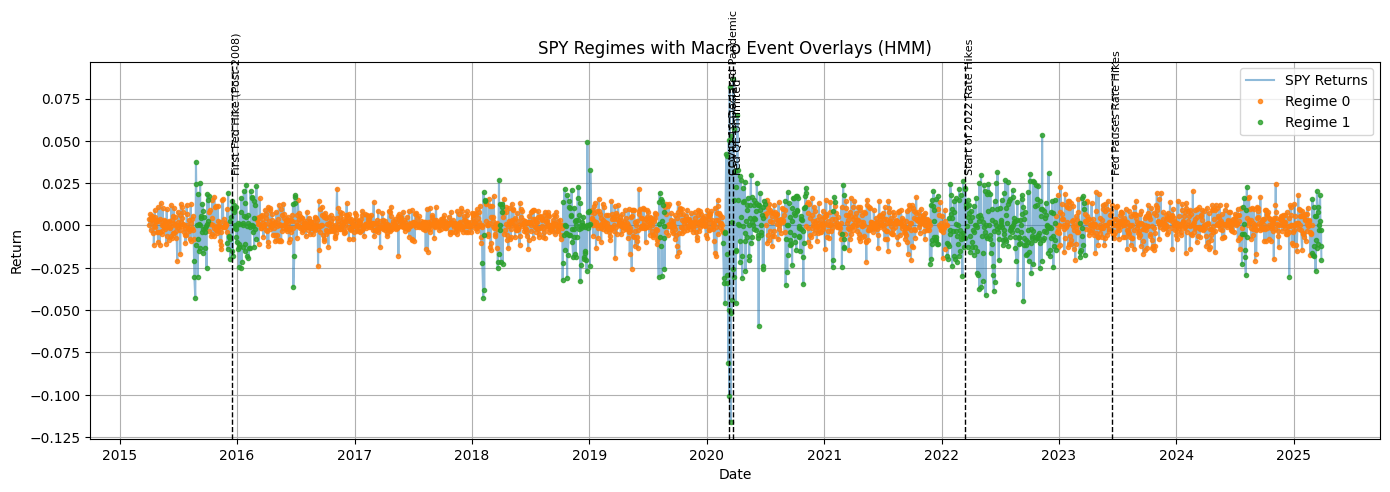

In [19]:
# Defining major economic events with dates and labels
macro_events = {
    '2015-12-16': 'First Fed Hike (Post-2008)',
    '2020-03-11': 'COVID-19 Declared Pandemic',
    '2020-03-23': 'Fed QE Unlimited',
    '2022-03-16': 'Start of 2022 Rate Hikes',
    '2023-06-14': 'Fed Pauses Rate Hikes'
}

# Re-plotting SPY HMM regime chart
plt.figure(figsize=(14, 5))
plt.plot(log_returns.index, spy_returns, label="SPY Returns", alpha=0.5)

for i in range(model.n_components):
    state_mask = hidden_states == i
    plt.plot(log_returns.index[state_mask], spy_returns[state_mask], '.', label=f'Regime {i}', alpha=0.8)

# Overlaying macro events
for date_str, label in macro_events.items():
    date = pd.to_datetime(date_str)
    if log_returns.index.min() <= date <= log_returns.index.max():
        plt.axvline(date, color='black', linestyle='--', linewidth=1)
        plt.text(date, 0.03, label, rotation=90, verticalalignment='bottom', fontsize=8)

plt.title("SPY Regimes with Macro Event Overlays (HMM)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
import warnings

# Preparing monthly SPY returns to match macro frequency
monthly_returns = monthly_market_data['SPY'].pct_change().dropna()

# Combining with macroeconomic indicators
combined_data = pd.concat([
    monthly_returns,
    macro_data[['Inflation', 'GDP', 'Fed_Interest_Rate', 'Unemployment_Rate']]
], axis=1).dropna()

combined_data.columns = ['SPY_Returns', 'Inflation', 'GDP', 'FedRate', 'Unemployment']

# Setting max lags to test
max_lag = 3
macro_vars = ['Inflation', 'GDP', 'FedRate', 'Unemployment']

# Suppressing deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Running again and cleanly printing results
for var in macro_vars:
    print(f"\n=== Granger Causality Test: {var} → SPY_Returns ===")
    for lag in range(1, max_lag + 1):
        test_result = grangercausalitytests(
            combined_data[['SPY_Returns', var]], maxlag=lag, verbose=False
        )
        p_value = test_result[lag][0]['ssr_ftest'][1]
        result = "Granger-causes" if p_value < 0.05 else "Does NOT Granger-cause"
        print(f"Lag {lag}: p = {p_value:.4f} → {result}")



=== Granger Causality Test: Inflation → SPY_Returns ===
Lag 1: p = 0.6664 → Does NOT Granger-cause
Lag 2: p = 0.8775 → Does NOT Granger-cause
Lag 3: p = 0.8505 → Does NOT Granger-cause

=== Granger Causality Test: GDP → SPY_Returns ===
Lag 1: p = 0.5640 → Does NOT Granger-cause
Lag 2: p = 0.4456 → Does NOT Granger-cause
Lag 3: p = 0.5286 → Does NOT Granger-cause

=== Granger Causality Test: FedRate → SPY_Returns ===
Lag 1: p = 0.6201 → Does NOT Granger-cause
Lag 2: p = 0.6421 → Does NOT Granger-cause
Lag 3: p = 0.7379 → Does NOT Granger-cause

=== Granger Causality Test: Unemployment → SPY_Returns ===
Lag 1: p = 0.7327 → Does NOT Granger-cause
Lag 2: p = 0.3942 → Does NOT Granger-cause
Lag 3: p = 0.6501 → Does NOT Granger-cause


ADF Stationarity Test Results:

SPY_Returns: p = 0.0000 → Stationary
FedRate: p = 0.4770 →  Not Stationary
Inflation: p = 0.9406 →  Not Stationary
GDP: p = 0.9937 →  Not Stationary
Unemployment: p = 0.0114 → Stationary

Fitted VAR Model with Lag Order: 4


<Figure size 1200x800 with 0 Axes>

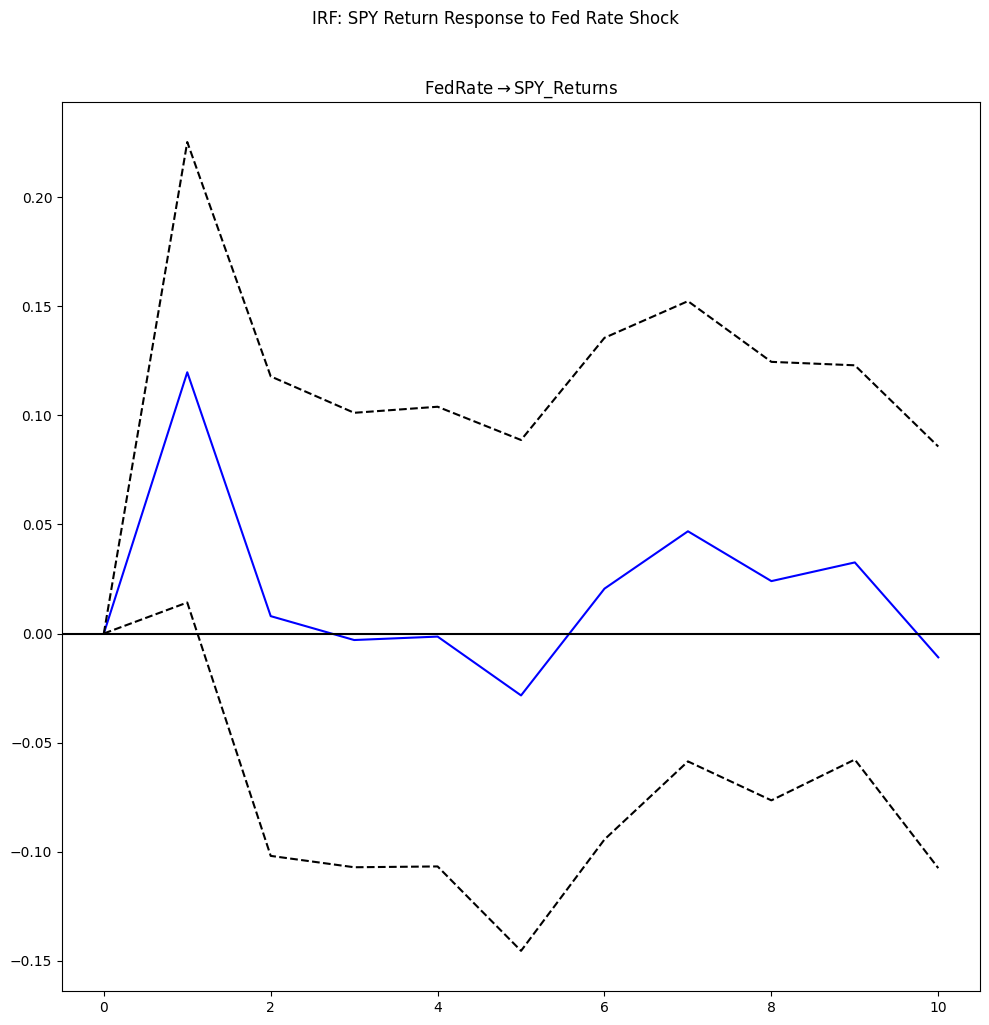

<Figure size 1200x800 with 0 Axes>

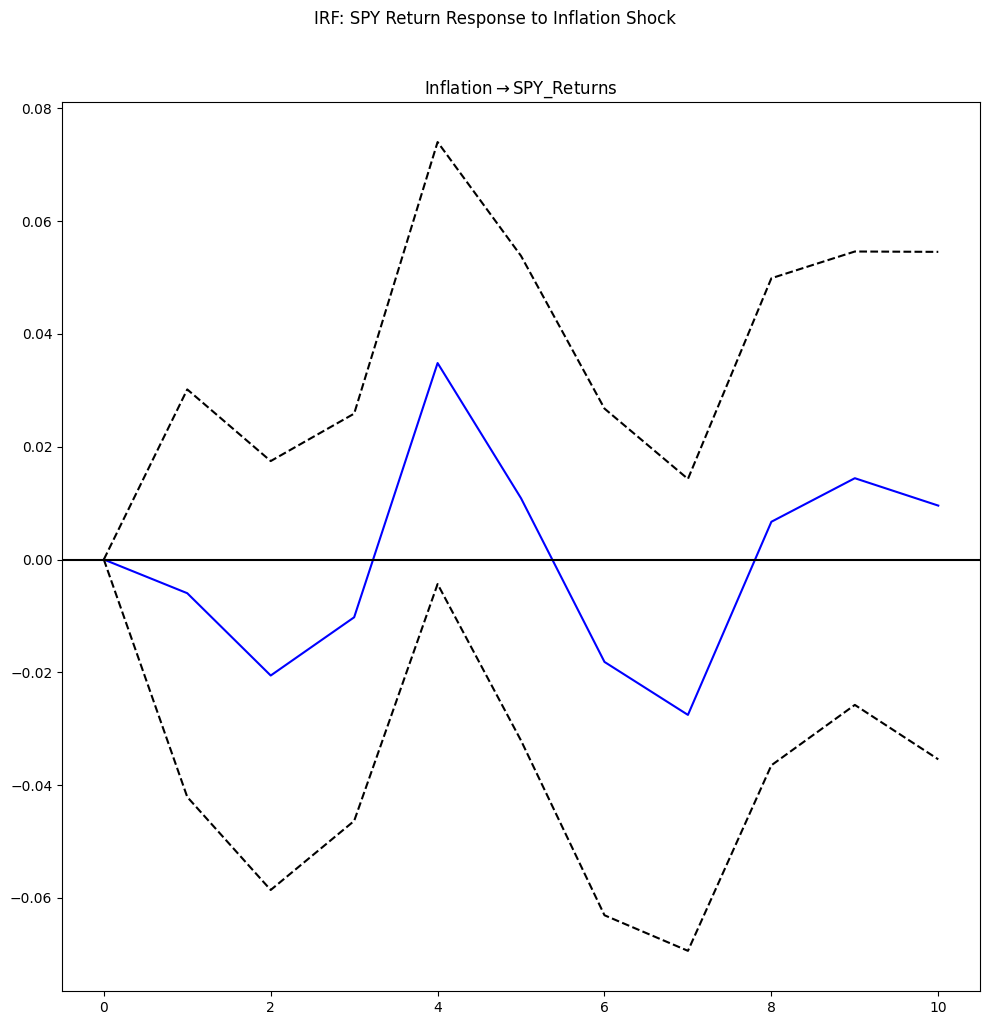

In [21]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Reusing the combined monthly data from Step 7B
var_data = combined_data[['SPY_Returns', 'FedRate', 'Inflation', 'GDP', 'Unemployment']].dropna()

# Checking stationarity: All variables must be stationary for VAR
print("ADF Stationarity Test Results:\n")
for col in var_data.columns:
    result = adfuller(var_data[col])
    print(f"{col}: p = {result[1]:.4f} → {'Stationary' if result[1] < 0.05 else ' Not Stationary'}")

# Fitting VAR model
model = VAR(var_data)
lag_order = model.select_order(maxlags=4).aic  # Select lag using AIC
results = model.fit(lag_order)

print(f"\nFitted VAR Model with Lag Order: {lag_order}")

# Plotting Impulse Response Functions (e.g., response of SPY to shocks in FedRate & Inflation)
irf = results.irf(10)  # 10-period impulse response

plt.figure(figsize=(12, 8))
irf.plot(orth=False, impulse='FedRate', response='SPY_Returns')
plt.suptitle("IRF: SPY Return Response to Fed Rate Shock", y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
irf.plot(orth=False, impulse='Inflation', response='SPY_Returns')
plt.suptitle("IRF: SPY Return Response to Inflation Shock", y=1.02)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np

# Creating return series at different frequencies
returns_freq = {}

# Daily log returns
returns_freq['Daily'] = np.log(adj_close / adj_close.shift(1))

# Weekly log returns (Friday as week-end)
weekly_prices = adj_close.resample('W-FRI').last()
returns_freq['Weekly'] = np.log(weekly_prices / weekly_prices.shift(1))

# Monthly log returns (month-end)
monthly_prices = adj_close.resample('M').last()
returns_freq['Monthly'] = np.log(monthly_prices / monthly_prices.shift(1))

# Function to compute summary statistics
def summary_stats(df):
    return pd.DataFrame({
        'Mean': df.mean(),
        'Std Dev': df.std(),
        'Skewness': df.skew(),
        'Kurtosis': df.kurtosis()
    })

# Compiling statistics per frequency
stats_summary = {freq: summary_stats(df.dropna()) for freq, df in returns_freq.items()}

# Combining into one DataFrame with multi-level columns
combined_stats = pd.concat(stats_summary, axis=1)

# Displaying the result per frequency
from IPython.display import display

print("Statistical Summary of Log Returns at Different Frequencies:\n")
for freq in combined_stats.columns.levels[0]:
    print(f"➤ {freq} Frequency:\n")
    display(combined_stats[freq])


Statistical Summary of Log Returns at Different Frequencies:

➤ Daily Frequency:



,Mean,Std Dev,Skewness,Kurtosis
BTC,0.002237,0.042065,-0.627972,9.863884
SPY,0.000447,0.010968,-0.808999,14.103472
TLT,-0.000050,0.009405,0.028913,4.864994


➤ Weekly Frequency:



,Mean,Std Dev,Skewness,Kurtosis
BTC,0.011140,0.094179,-0.221043,2.923350
SPY,0.002232,0.023422,-0.854465,7.261330
TLT,-0.000229,0.019702,-0.266536,1.199182


➤ Monthly Frequency:



,Mean,Std Dev,Skewness,Kurtosis
BTC,0.049398,0.206152,-0.021597,0.020929
SPY,0.009690,0.044629,-0.541418,0.587852
TLT,-0.000690,0.039589,0.134158,0.061274


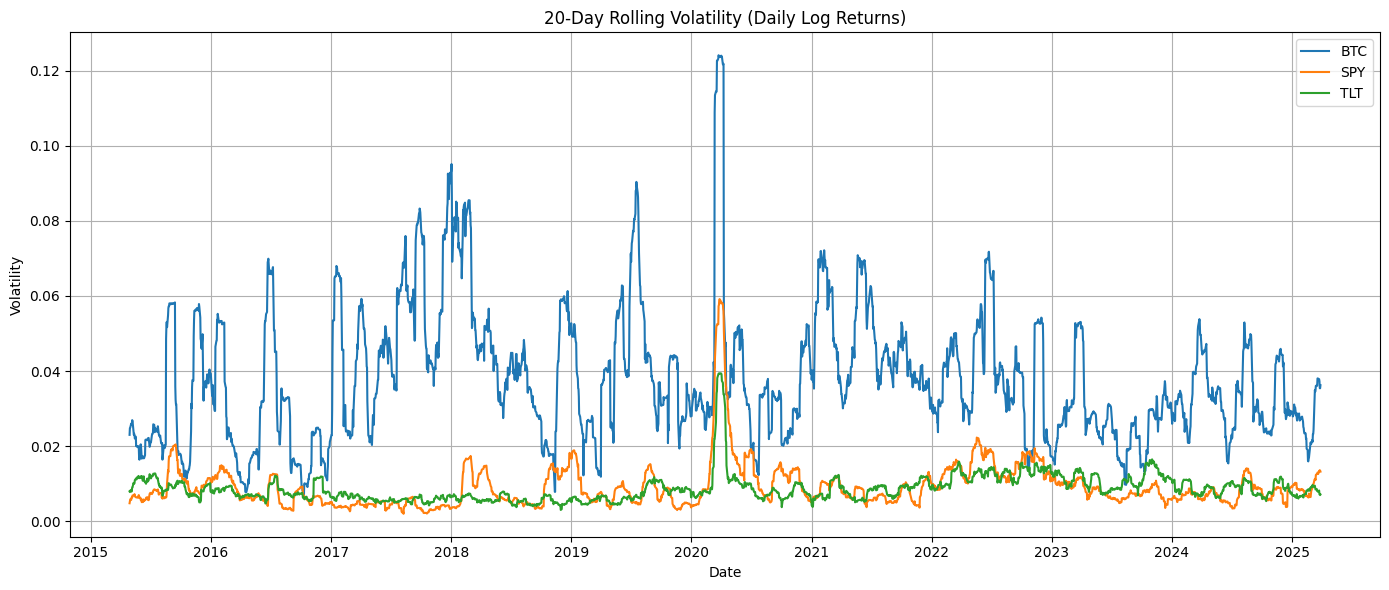

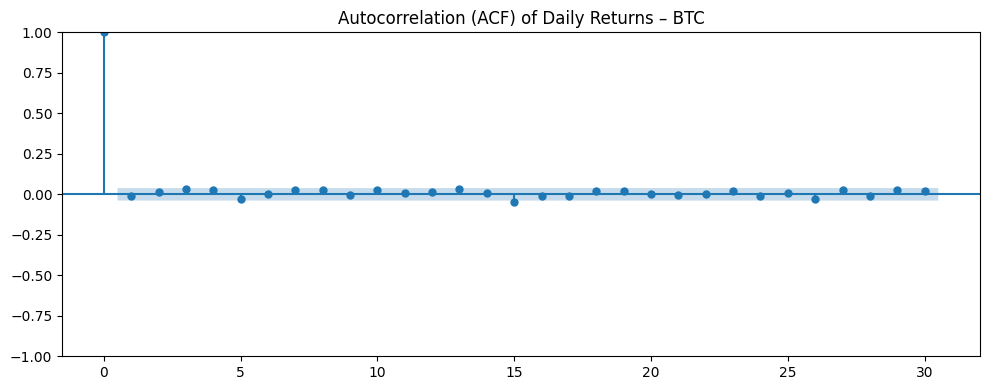

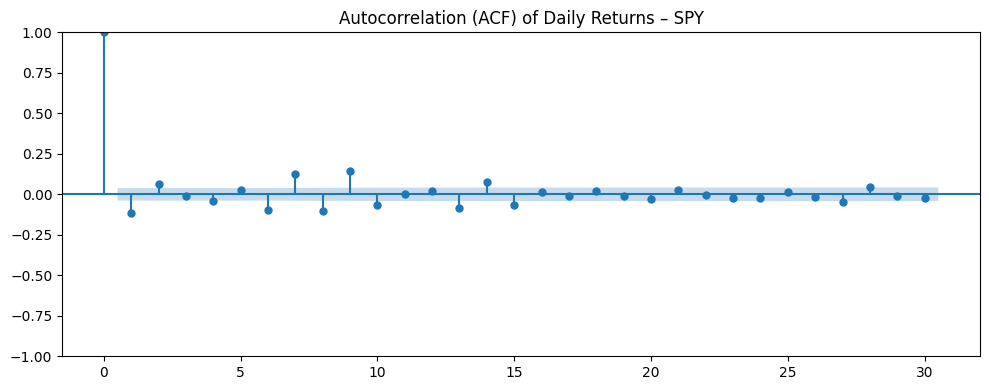

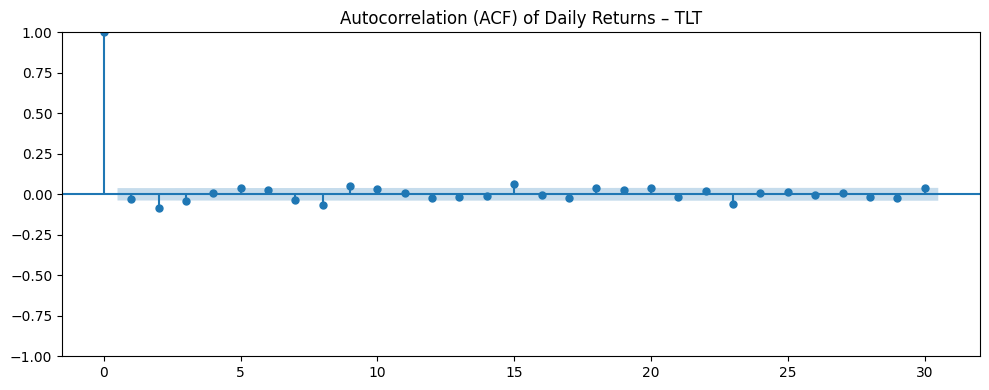

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Using daily log returns
daily_returns = returns_freq['Daily'].dropna()

# Rolling volatility (20-day window) for clustering
rolling_vol = daily_returns.rolling(window=20).std()

# Plotting rolling volatilities
plt.figure(figsize=(14, 6))
for col in rolling_vol.columns:
    plt.plot(rolling_vol.index, rolling_vol[col], label=f'{col}')
plt.title("20-Day Rolling Volatility (Daily Log Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting ACF for each asset (first 30 lags)
for col in daily_returns.columns:
    fig, ax = plt.subplots(figsize=(10, 4))
    plot_acf(daily_returns[col], lags=30, ax=ax)
    plt.title(f"Autocorrelation (ACF) of Daily Returns – {col}")
    plt.tight_layout()
    plt.show()
